In [1]:
import bob.measure as bm

In [17]:
import pandas as pd

scorefile =  pd.read_csv('testfolder/English-English-p-p-02-03 _adapt', delimiter=' ', header=0, names=['subject_id', 'session_id', 'score'])
trialfile = pd.read_csv('testfolder/trial_key.tsv', delimiter = '\t')

In [18]:
trialfile

,modelid,segment,channel,targettype
0,1000,1_00042_f_03_08_p_2,p,target
1,1000,1_00042_f_03_06_p_2,p,target
2,1000,1_00042_f_03_07_p_2,p,target
3,1000,1_00042_f_03_05_p_2,p,target
4,1000,1_00021_m_03_07_p_2,p,nontarget
...,...,...,...,...
152095,1194,4_00006_m_03_07_p_2,p,nontarget
152096,1194,4_00048_m_03_05_p_2,p,nontarget
152097,1194,4_00048_m_03_07_p_2,p,nontarget
152098,1194,4_00048_m_03_06_p_2,p,nontarget


In [19]:
scorefile

,subject_id,session_id,score
0,1000,1_00042_f_03_06_p_2,30.246640
1,1000,1_00042_f_03_07_p_2,0.529884
2,1000,1_00042_f_03_05_p_2,-9.128469
3,1000,1_00021_m_03_07_p_2,-59.981260
4,1000,1_00021_m_03_05_p_2,-72.169650
...,...,...,...
152094,1194,4_00006_m_03_07_p_2,-35.364220
152095,1194,4_00048_m_03_05_p_2,-59.293480
152096,1194,4_00048_m_03_07_p_2,-34.011110
152097,1194,4_00048_m_03_06_p_2,-39.767290


In [20]:
merged = pd.merge(trialfile, scorefile, how='left', left_on=['modelid', 'segment'], right_on=['subject_id', 'session_id'])

In [21]:
merged

,modelid,segment,channel,targettype,subject_id,session_id,score
0,1000,1_00042_f_03_08_p_2,p,target,NaN,NaN,NaN
1,1000,1_00042_f_03_06_p_2,p,target,1000.0,1_00042_f_03_06_p_2,30.246640
2,1000,1_00042_f_03_07_p_2,p,target,1000.0,1_00042_f_03_07_p_2,0.529884
3,1000,1_00042_f_03_05_p_2,p,target,1000.0,1_00042_f_03_05_p_2,-9.128469
4,1000,1_00021_m_03_07_p_2,p,nontarget,1000.0,1_00021_m_03_07_p_2,-59.981260
...,...,...,...,...,...,...,...
152095,1194,4_00006_m_03_07_p_2,p,nontarget,1194.0,4_00006_m_03_07_p_2,-35.364220
152096,1194,4_00048_m_03_05_p_2,p,nontarget,1194.0,4_00048_m_03_05_p_2,-59.293480
152097,1194,4_00048_m_03_07_p_2,p,nontarget,1194.0,4_00048_m_03_07_p_2,-34.011110
152098,1194,4_00048_m_03_06_p_2,p,nontarget,1194.0,4_00048_m_03_06_p_2,-39.767290


In [24]:
merged = merged.dropna(subset=['score'])
merged

,modelid,segment,channel,targettype,subject_id,session_id,score
1,1000,1_00042_f_03_06_p_2,p,target,1000.0,1_00042_f_03_06_p_2,30.246640
2,1000,1_00042_f_03_07_p_2,p,target,1000.0,1_00042_f_03_07_p_2,0.529884
3,1000,1_00042_f_03_05_p_2,p,target,1000.0,1_00042_f_03_05_p_2,-9.128469
4,1000,1_00021_m_03_07_p_2,p,nontarget,1000.0,1_00021_m_03_07_p_2,-59.981260
5,1000,1_00021_m_03_05_p_2,p,nontarget,1000.0,1_00021_m_03_05_p_2,-72.169650
...,...,...,...,...,...,...,...
152095,1194,4_00006_m_03_07_p_2,p,nontarget,1194.0,4_00006_m_03_07_p_2,-35.364220
152096,1194,4_00048_m_03_05_p_2,p,nontarget,1194.0,4_00048_m_03_05_p_2,-59.293480
152097,1194,4_00048_m_03_07_p_2,p,nontarget,1194.0,4_00048_m_03_07_p_2,-34.011110
152098,1194,4_00048_m_03_06_p_2,p,nontarget,1194.0,4_00048_m_03_06_p_2,-39.767290


In [30]:
trial_scores = merged[['modelid', 'targettype', 'score']]
trial_scores
positives = trial_scores.loc[trial_scores['targettype'] == 'target']['score']
negatives = trial_scores.loc[trial_scores['targettype'] == 'nontarget']['score']

In [31]:
positives

1         30.246640
2          0.529884
3         -9.128469
780       17.314390
781       15.852490
            ...    
150543    25.399040
151320    25.308680
151321   -55.165810
151322     2.913512
151323     3.671168
Name: score, Length: 779, dtype: float64

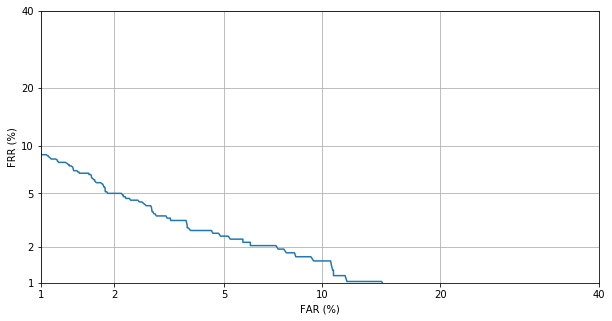

In [40]:
from matplotlib import pyplot
#npoints = 10000
fig = pyplot.figure(figsize=(10,5))
bm.plot.det(negatives, positives, linestyle='-', label='test') 
bm.plot.det_axis([1, 40, 1, 40]) 
pyplot.xlabel('FAR (%)') 
pyplot.ylabel('FRR (%)') 
pyplot.grid(True)
pyplot.show()
#     if save:
#         fig.savefig(filename)